In [16]:
import os
import sys


script_dirname = os.path.abspath('')
ROOT_DIR = os.path.realpath( os.path.join( script_dirname,
                                           f'..{ os.path.sep }..' ))

if ROOT_DIR not in sys.path:
  sys.path.append( ROOT_DIR )

if 'PYTHONPATH' not in os.environ:
  os.environ[ 'PYTHONPATH' ] = ''
  
  for path in sys.path:
    os.environ[ 'PYTHONPATH' ] += path
    if path != sys.path[ -1 ]:
      os.environ[ 'PYTHONPATH' ] += os.pathsep

elif ROOT_DIR not in os.environ[ 'PYTHONPATH' ]:
  os.environ[ 'PYTHONPATH' ] += os.pathsep + ROOT_DIR

## Show coefficients of dimensionality reduction procedure

In [17]:
import math
import pickle

elements = ['K', 'Ca', 'Ti', 'Cr', 'Mn', 'Fe', 'Zn', 'Rb', 'Sr']

def relevant_elements(component, threshold=None):
    ranking = sorted(list(zip(component, elements)),
                     key=lambda p: abs(p[0]), reverse=True)
    magnitude = math.log10(abs(ranking[0][0]))
    cropped_magnitude = math.floor(magnitude) if magnitude < 0 \
                                              else math.ceil(magnitude)
    if threshold is None:
        threshold = 10 ** cropped_magnitude
    return threshold, [r[1] for r in ranking if abs(r[0]) >= threshold]

In [18]:
def relevant_elements_of_model(experiment, model_type, model_no):

    file_name = f'../../models/JAS/{experiment}/{model_type}-{model_no}'
    with open(file_name, 'rb') as f:
        model = pickle.load(f)
    dim_red = model.named_steps['dim_reduction']
    red_type = dim_red.__class__.__name__
    if hasattr(dim_red, 'components_'):
        return red_type, [relevant_elements(c) for c in dim_red.components_]
    else:
        return 'NO DIM REDUCTION'

def relevant_elements_of_model_class(experiment, model_type):
    return [relevant_elements_of_model(experiment, model_type, i)
            for i in range(4)]

def print_results(rel, f):
        for i, r in enumerate(rel):

            
            if r == 'NO DIM REDUCTION':
                f.write(f'{i}-th fold\n')
                f.write(r)
            else:
                f.write(f'{i}-th fold ({r[0]})\n')
                for c, elements in enumerate(r[1]):
                    f.write(f'  {c}-th component: {" ".join(elements[1])} '
                            f'(magnitude: {elements[0]})\n')


def experiment_report(experiment):
    with open(f'../../logs/JAS/dim_reduction-{experiment}.log', 'w') as f: 
        f.write(f'Report for {experiment}\n')
        for model_class in ('DT', 'KNN', 'LDA',
                            'LR', 'MLP', 'NB', 'RF',
                            'SVM-lin', 'SVM-poly', 'SVM-rbf'):
            f.write(f'\n----------------- {model_class}---------------\n')
            rel = relevant_elements_of_model_class(experiment, model_class)
            print_results(rel, f)

## all experiments

In [19]:
experiment_report('all_measures')
experiment_report('frag_nosample')
experiment_report('frag_sample-2')

In [20]:
def relevant_elements_of_model(experiment, model_type, model_no):

    file_name = f'../../models/JAS/{experiment}/{model_type}-{model_no}'
    with open(file_name, 'rb') as f:
        model = pickle.load(f)
    dim_red = model.named_steps['dim_reduction']
    red_type = dim_red.__class__.__name__
    if hasattr(dim_red, 'components_'):
        return red_type, [relevant_elements(c) for c in dim_red.components_]
    else:
        return 'NO DIM REDUCTION'

def relevant_elements_of_model_class(experiment, model_type):
    return [relevant_elements_of_model(experiment, model_type, i)
            for i in range(4)]

def print_results(rel, f):
        for i, r in enumerate(rel):

            
            if r == 'NO DIM REDUCTION':
                f.write(f'{i}-th fold\n')
                f.write(r)
            else:
                f.write(f'{i}-th fold ({r[0]})\n')
                for c, elements in enumerate(r[1]):
                    f.write(f'  {c}-th component: {" ".join(elements[1])} '
                            f'(magnitude: {elements[0]})\n')


def components_report(experiment, model_type):
    print('-'*40)
    for model_no in range(4):
        file_name = f'../../models/JAS/{experiment}/{model_type}-{model_no}'
        with open(file_name, 'rb') as f:
            model = pickle.load(f)
        dim_red = model.named_steps['dim_reduction']
        red_type = dim_red.__class__.__name__
        print(f'{experiment}, {model_type}, fold {model_no} --', end=' ')
        if hasattr(dim_red, 'components_'):
            print(f'technique: {red_type}, {len(dim_red.components_)} components')
            for i, component in enumerate(dim_red.components_):
                print(f'{i}-th component coeffs: ', end='')
                coeffs = [round(c, 3) for c in component]
                for el, coeff in zip(elements, coeffs):
                    print(f'{coeff} ({el})', end=' ')
                print()
        else:
            print('NO DIM REDUCTION')
        print()

components_report('all_measures', 'DT')
components_report('frag_nosample', 'DT')
components_report('frag_sample-2', 'DT')

----------------------------------------
all_measures, DT, fold 0 -- technique: TruncatedSVD, 2 components
0-th component coeffs: 0.31 (K) 0.793 (Ca) 0.043 (Ti) 0.006 (Cr) 0.015 (Mn) 0.523 (Fe) 0.001 (Zn) 0.001 (Rb) 0.002 (Sr) 
1-th component coeffs: 0.403 (K) -0.609 (Ca) 0.055 (Ti) 0.009 (Cr) 0.023 (Mn) 0.68 (Fe) 0.002 (Zn) 0.002 (Rb) 0.0 (Sr) 

all_measures, DT, fold 1 -- technique: PCA, 9 components
0-th component coeffs: 0.269 (K) -0.829 (Ca) 0.044 (Ti) 0.007 (Cr) 0.02 (Mn) 0.488 (Fe) 0.001 (Zn) 0.001 (Rb) -0.001 (Sr) 
1-th component coeffs: 0.768 (K) -0.121 (Ca) 0.006 (Ti) -0.002 (Cr) -0.021 (Mn) -0.629 (Fe) -0.001 (Zn) 0.001 (Rb) -0.0 (Sr) 
2-th component coeffs: -0.383 (K) -0.321 (Ca) 0.683 (Ti) 0.051 (Cr) 0.335 (Mn) -0.41 (Fe) 0.017 (Zn) 0.006 (Rb) 0.02 (Sr) 
3-th component coeffs: -0.085 (K) -0.105 (Ca) -0.565 (Ti) 0.07 (Cr) 0.802 (Mn) -0.115 (Fe) 0.035 (Zn) -0.006 (Rb) -0.031 (Sr) 
4-th component coeffs: -0.149 (K) -0.145 (Ca) -0.181 (Ti) 0.91 (Cr) -0.259 (Mn) -0.15 (Fe) -0.0

## Show decision trees

In [21]:
import matplotlib.pyplot as plt
import pickle
from sklearn.tree import plot_tree

def show_tree(experiment, model_name):
    file_name = f'../../models/JAS/{experiment}/{model_name}'

    with open(file_name, 'rb') as f:
        model = pickle.load(f)
    tree = model.named_steps['learning_algorithm']
    plt.figure(figsize=(20, 20))
    plot_tree(tree)
    plt.savefig(f'tree-{experiment}-{model_name}')
    plt.show()

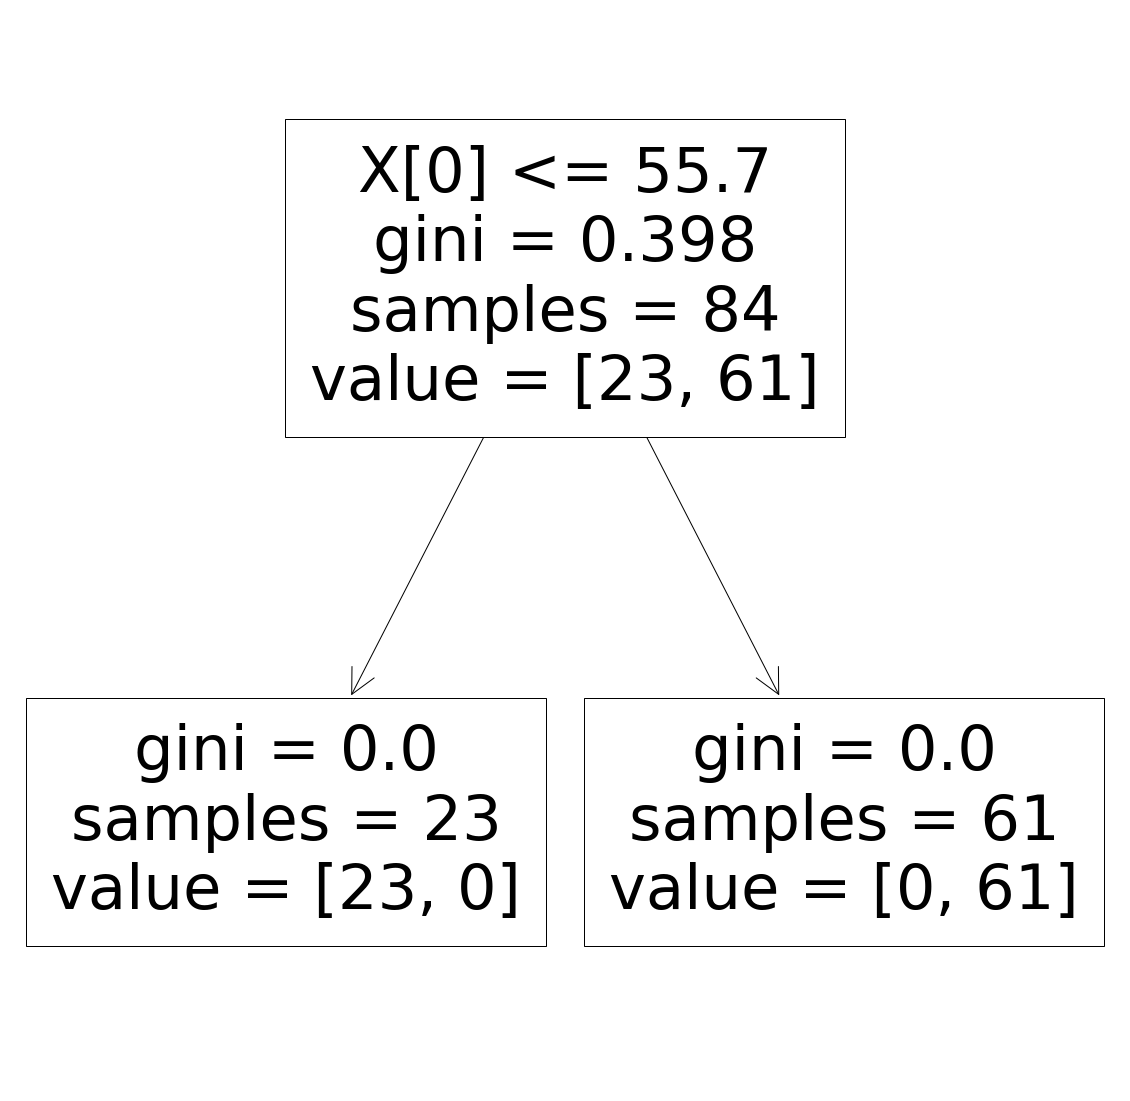

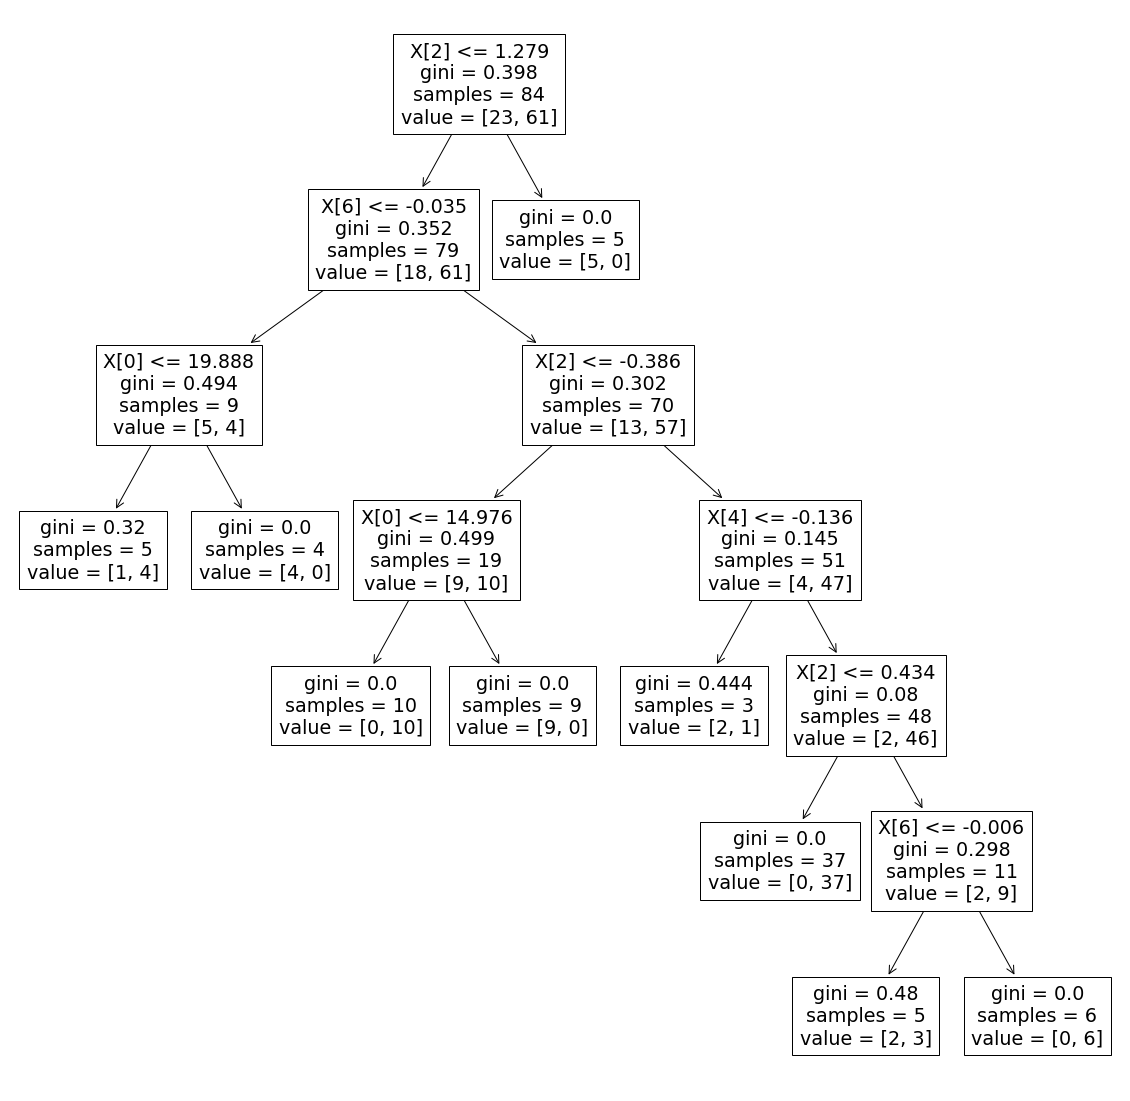

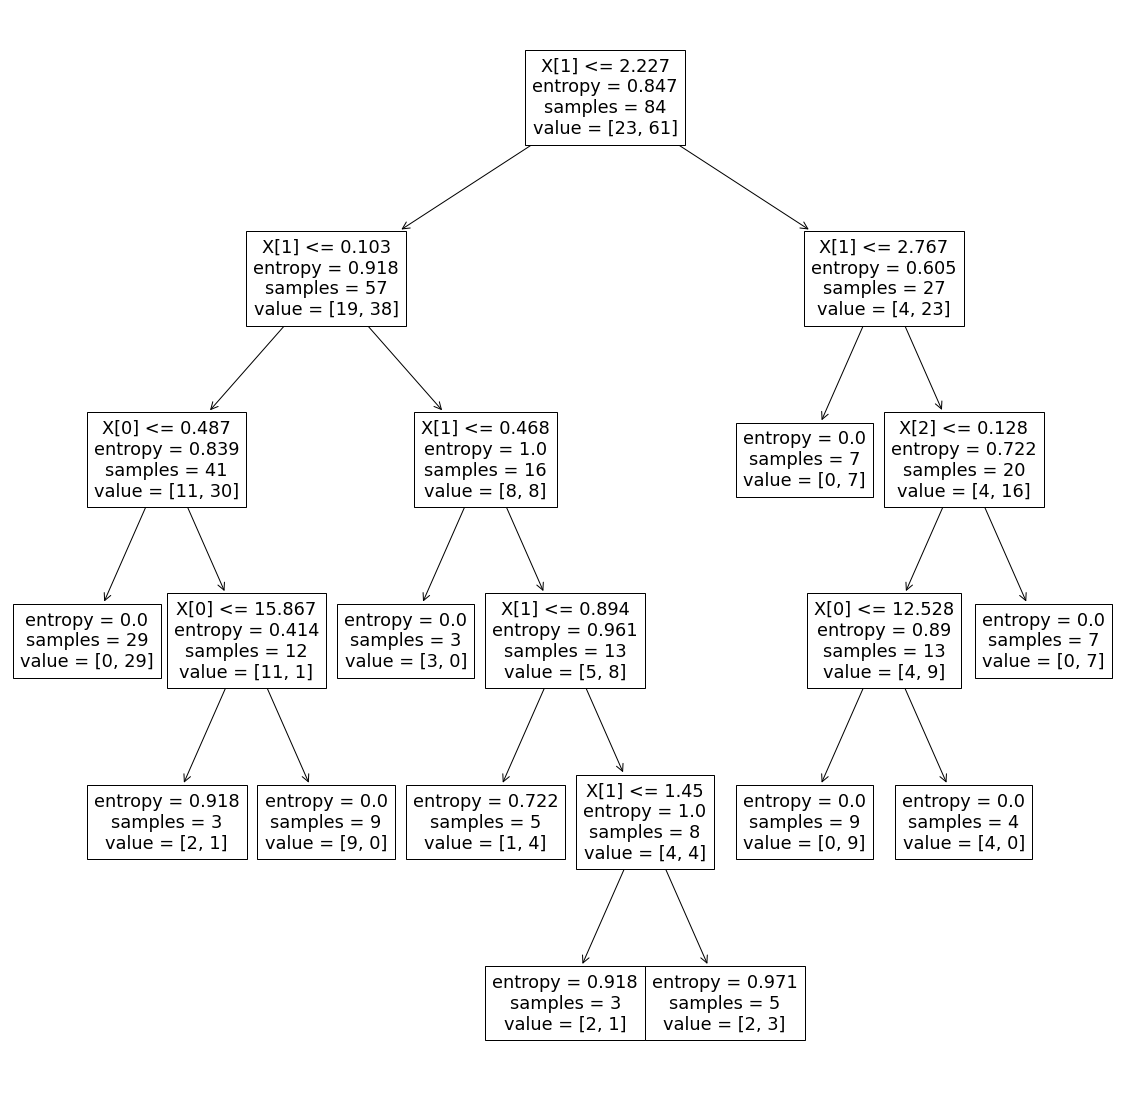

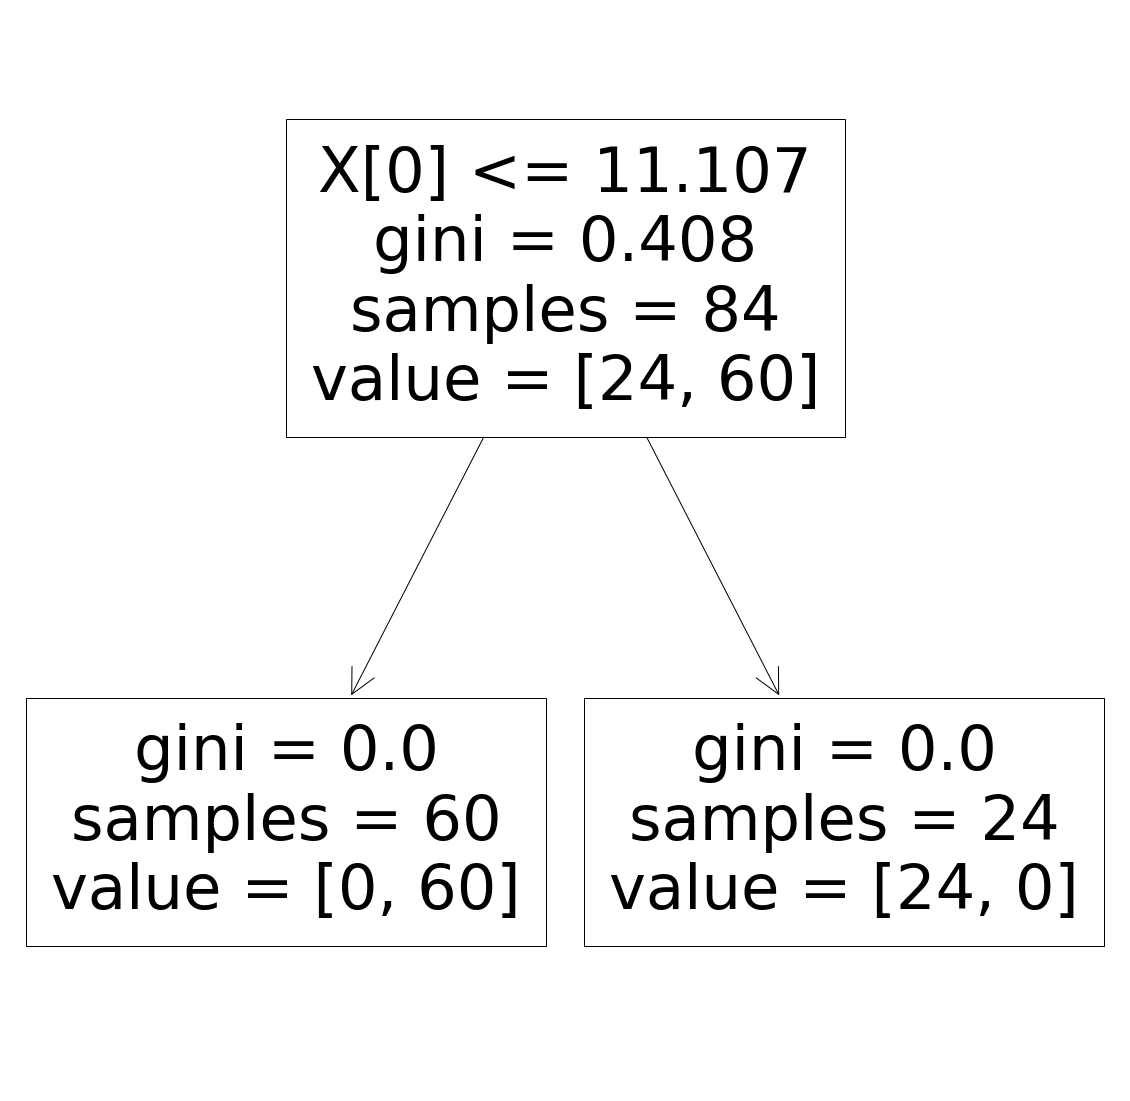

[None, None, None, None]

In [22]:
[show_tree('all_measures', f'DT-{i}') for i in range(4)]

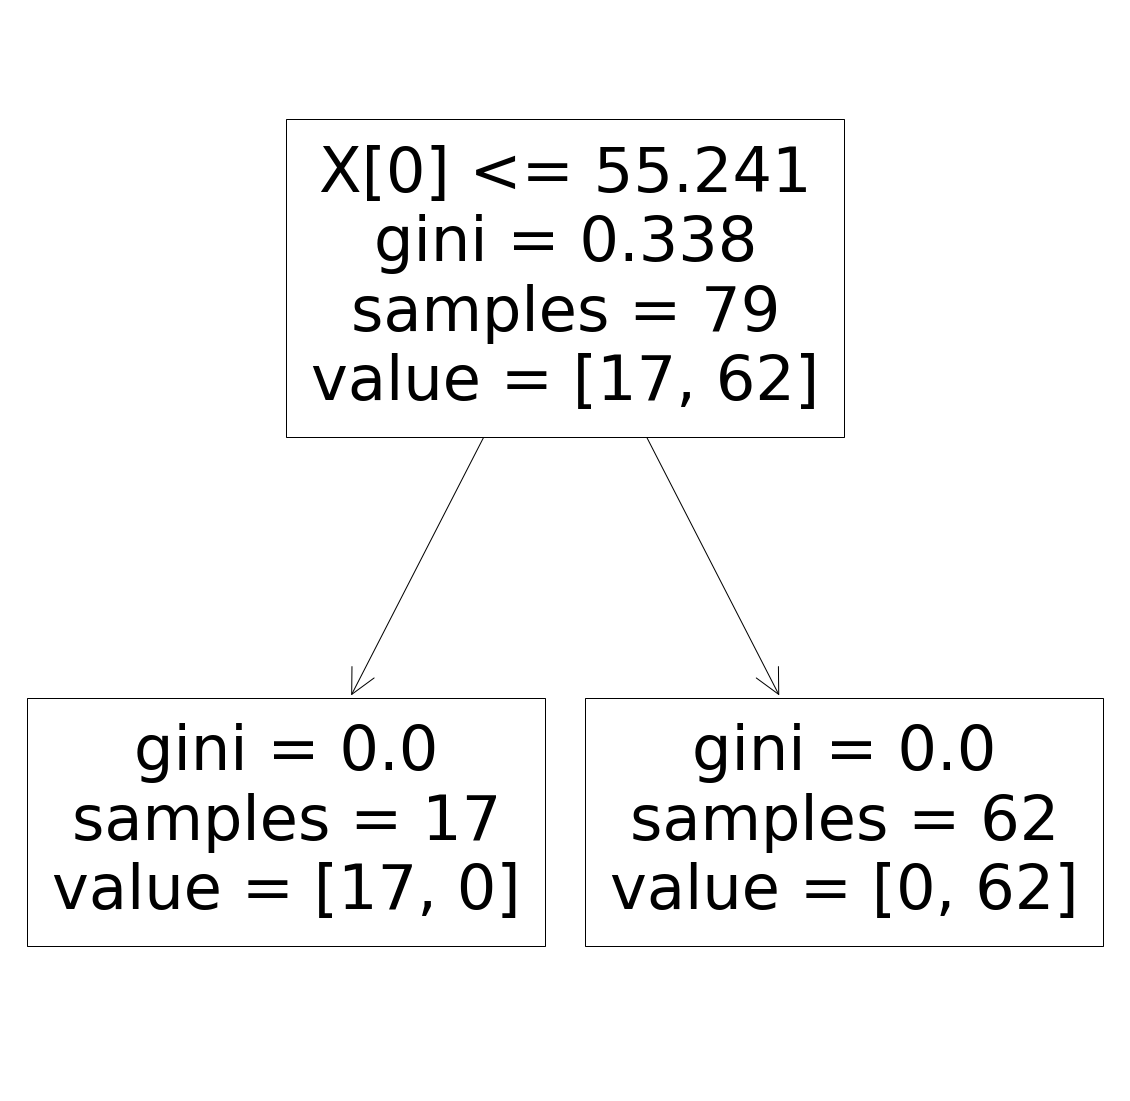

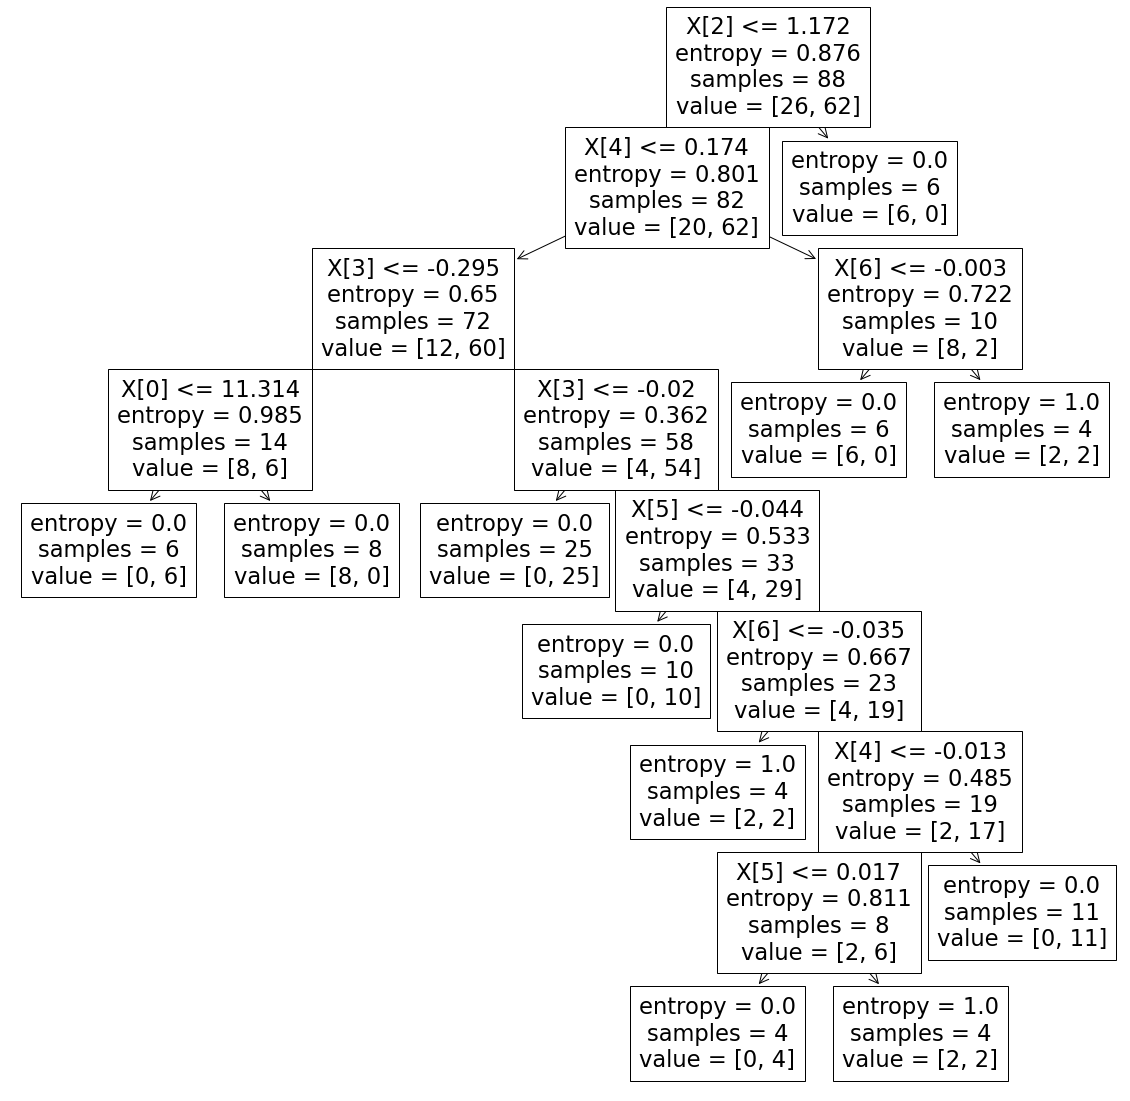

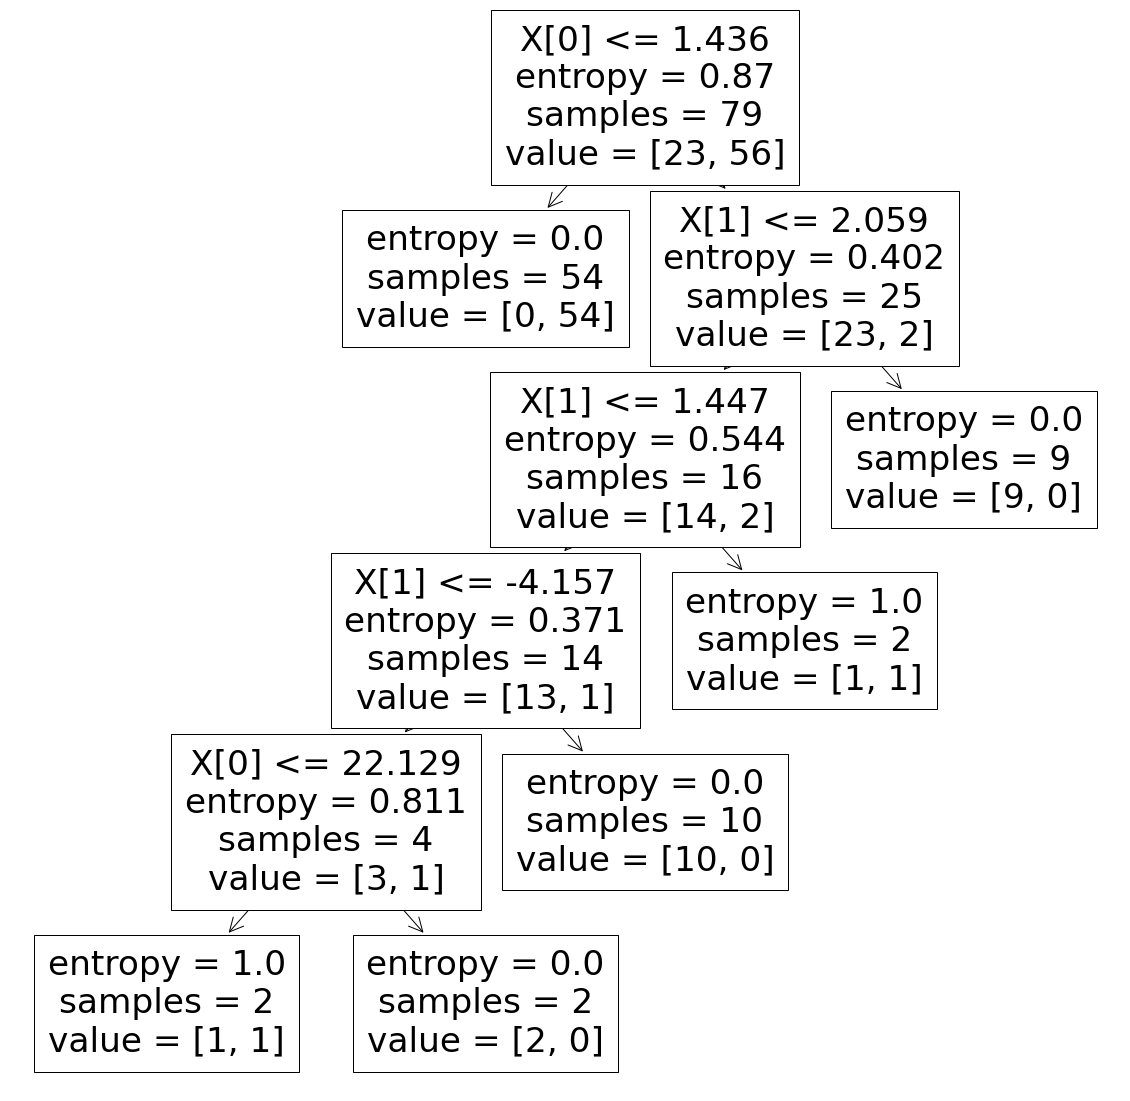

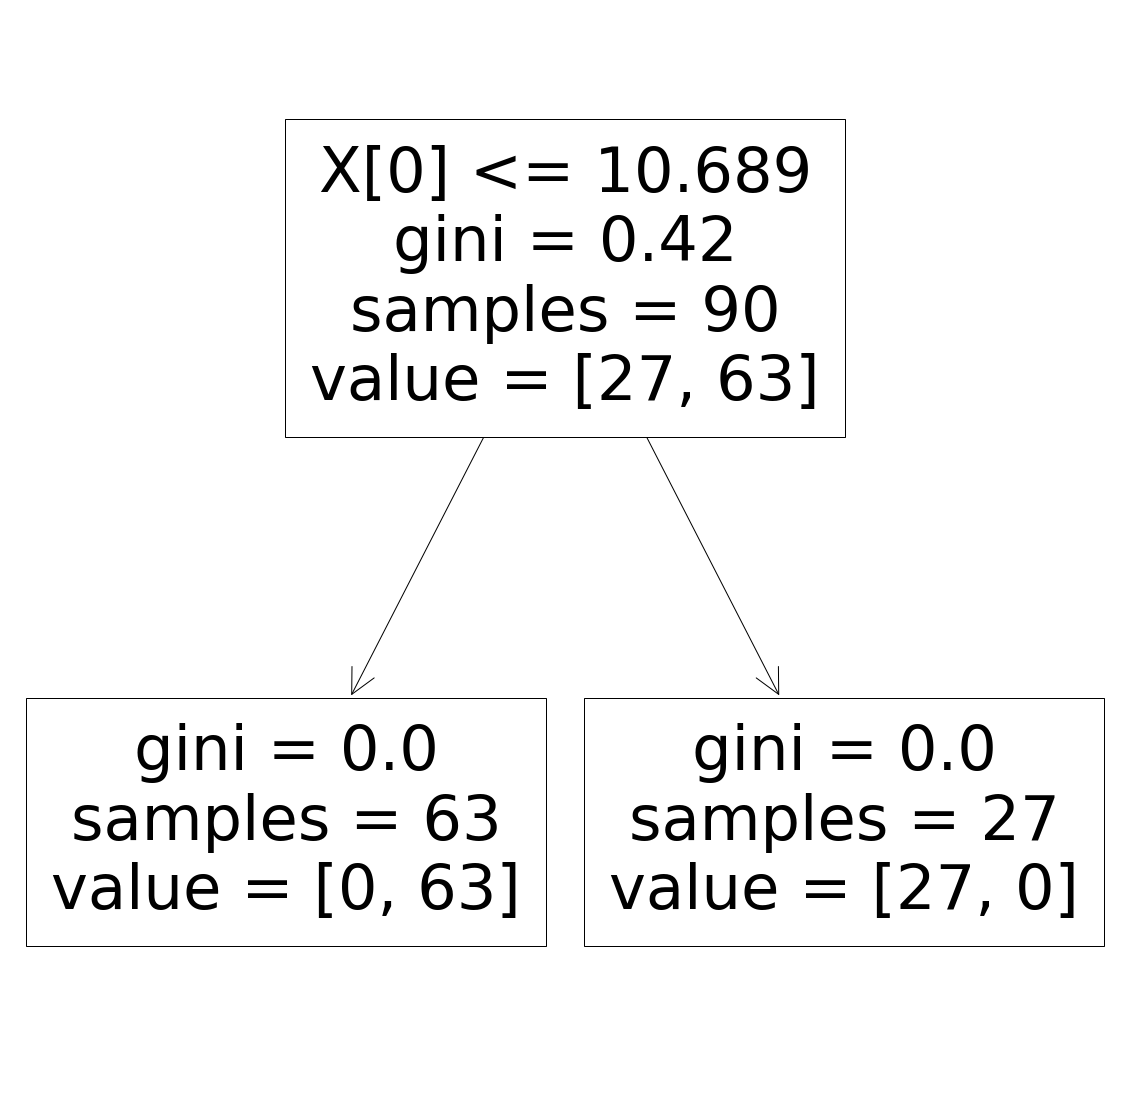

[None, None, None, None]

In [23]:
[show_tree('frag_nosample', f'DT-{i}') for i in range(4)]

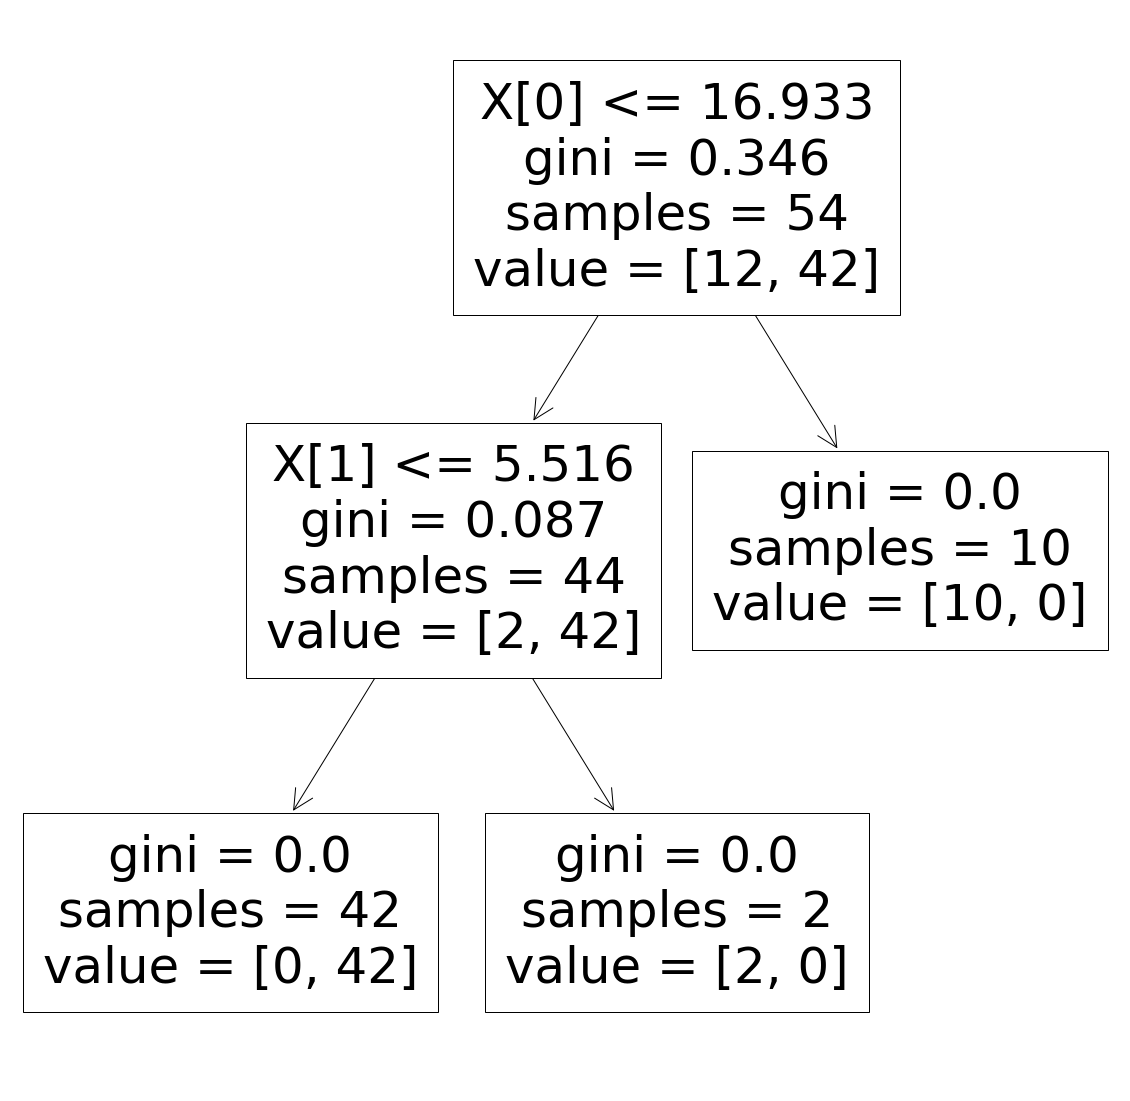

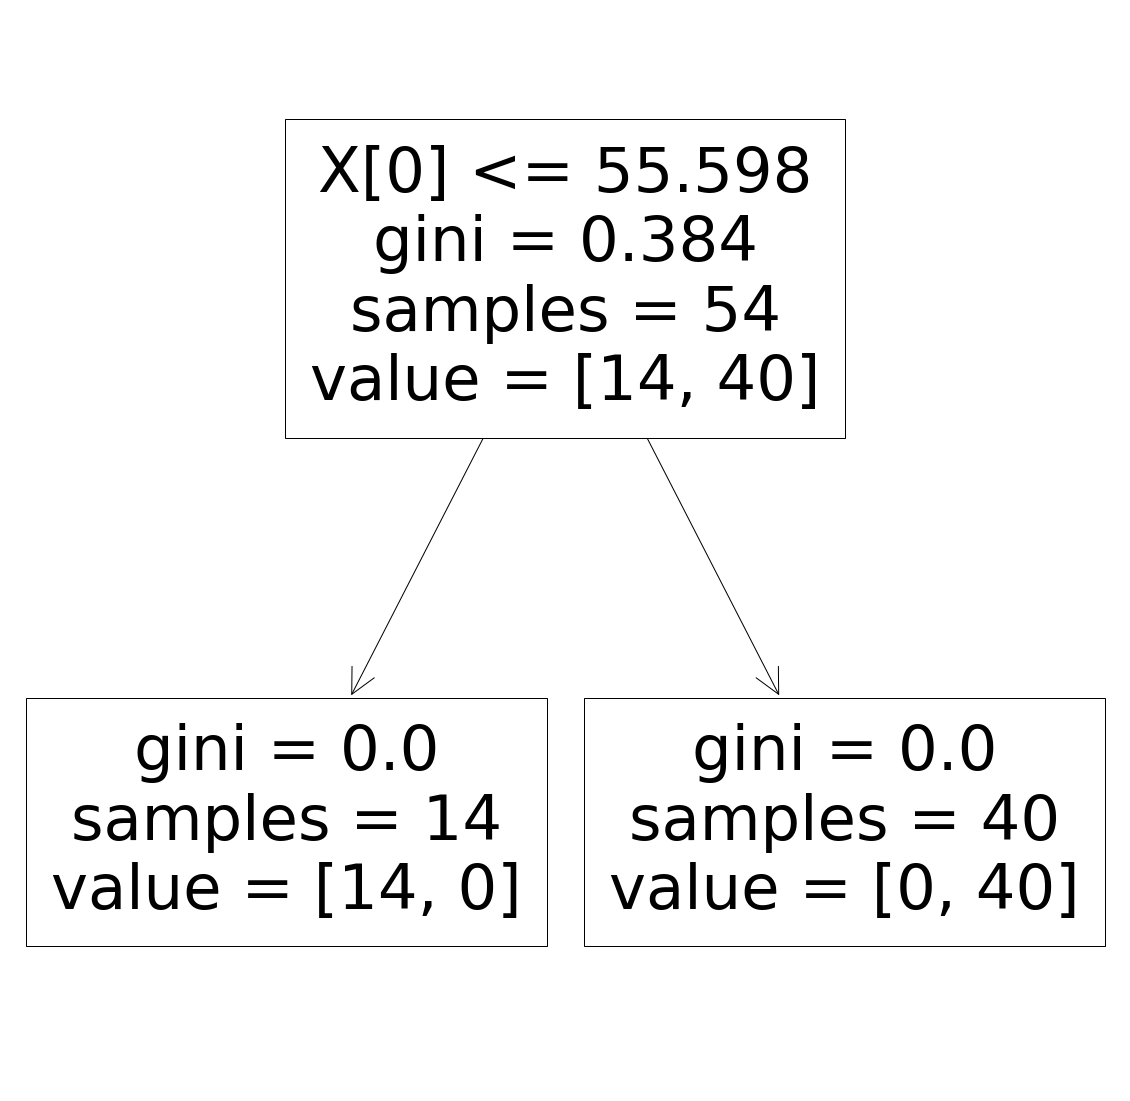

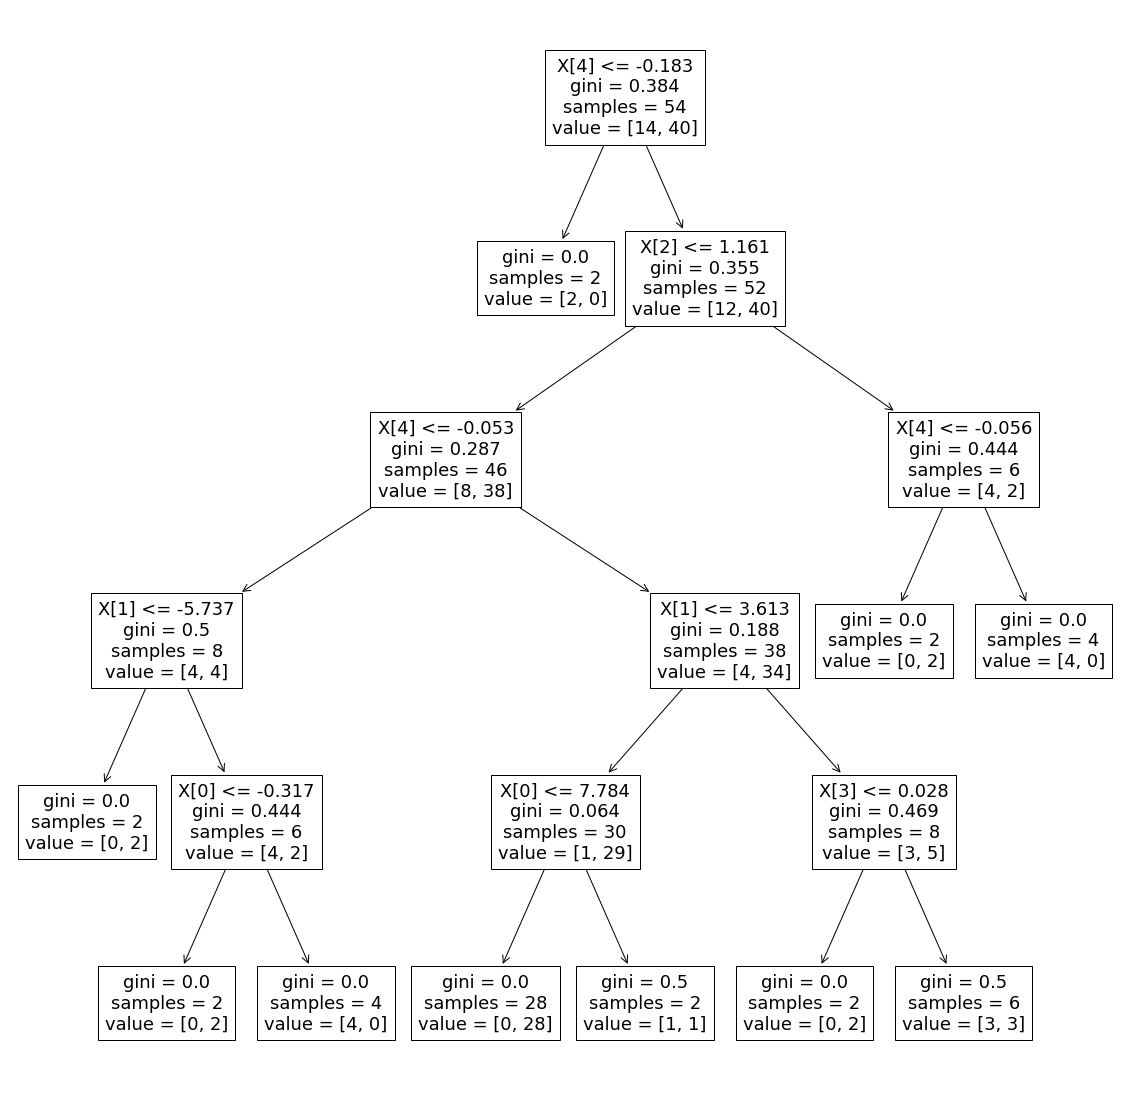

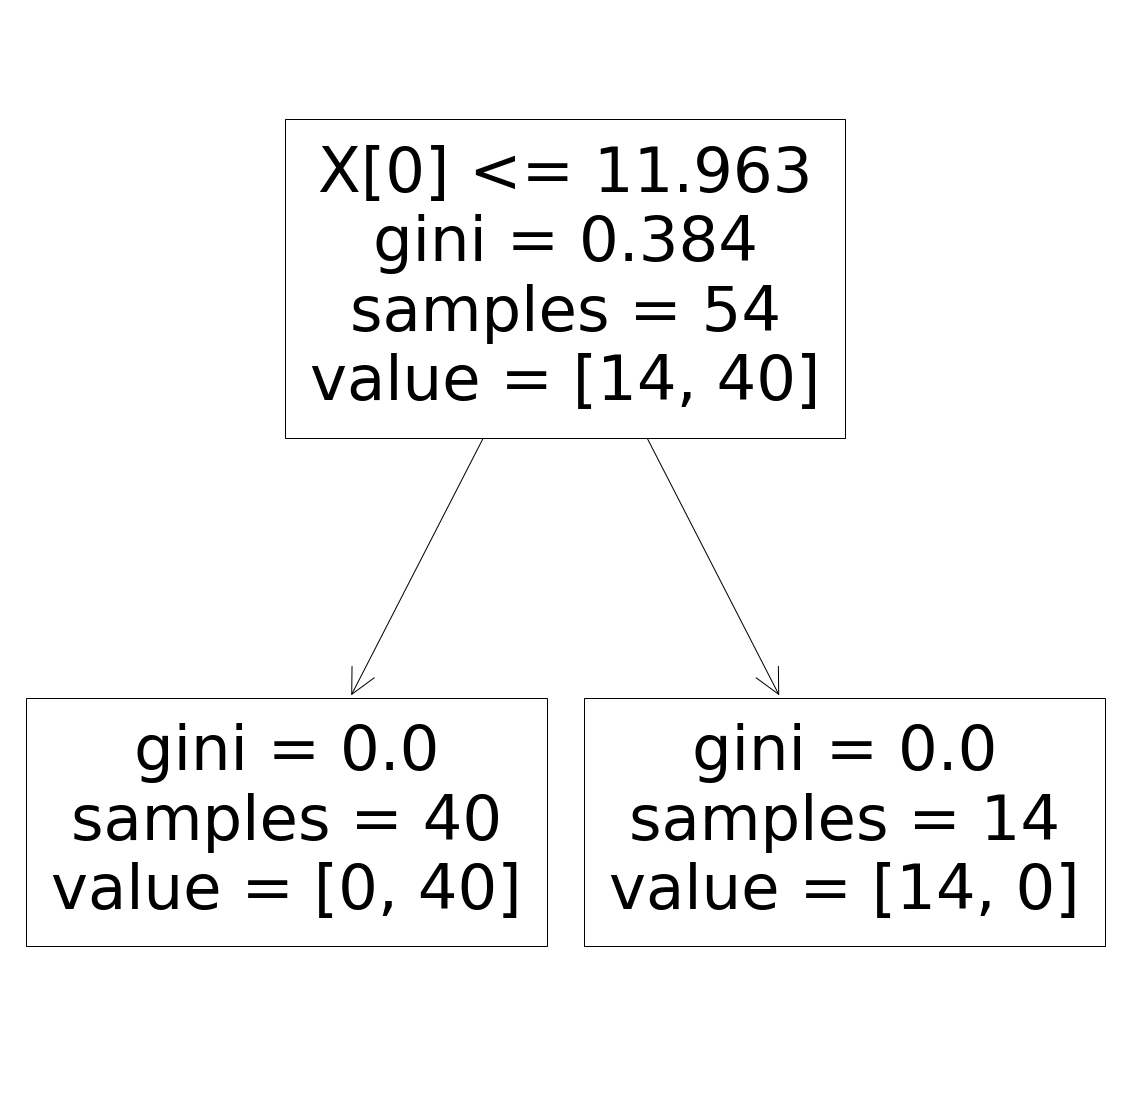

[None, None, None, None]

In [24]:
[show_tree('frag_sample-2', f'DT-{i}') for i in range(4)]